# **SINGLE LABEL MULTICLASS CLASSIFICATION**

In this project, I develop a single label multiclass classification on the *reuters* dataset, to classify the newswires into 46 different classes.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### **Load the dataset from keras.datasets**

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words = 10000
)

print(train_data[0])
print(train_labels[0])

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


As displayed above, the input data (train_data) is a sequence of integers. Let's decode this sequence back to text.

### **Decode the sequence back to text**

In [18]:
word_index = reuters.get_word_index()
reversed_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])

# decode the first entry in the training data
decoded_newswire = " ".join(
    reversed_word_index.get(i-3, "") for i in train_data[0]
)

decoded_newswire

'   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### **Encode the input data and labels**

In [11]:
# dunction to vectorize (one-hot encoding) the input data
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
        
    return results

In [12]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
# encode the labels, by casting them as integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)

y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

### **Build Model**

In [21]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [25]:
# Set aside a validation data
x_val = x_train[:1000]
partition_x_train = x_train[1000:]

y_val = y_train[:1000]
partition_y_train = y_train[1000:]

In [26]:
# train the model
history = model.fit(
    partition_x_train,
    partition_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history = history.history

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3398 - loss: 3.1712 - val_accuracy: 0.6060 - val_loss: 1.8716
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6556 - loss: 1.6505 - val_accuracy: 0.6750 - val_loss: 1.4005
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7272 - loss: 1.2430 - val_accuracy: 0.7300 - val_loss: 1.2088
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7836 - loss: 1.0135 - val_accuracy: 0.7640 - val_loss: 1.0962
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8230 - loss: 0.8302 - val_accuracy: 0.7890 - val_loss: 1.0109
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8528 - loss: 0.6810 - val_accuracy: 0.7990 - val_loss: 0.9368
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8739 - loss: 0.5784 - val_accuracy: 0.8090 - val_loss: 0.8966
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9012 - loss: 0.4594 - val_accuracy: 0.7970 - v

In [28]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### **Plot loss and accuracy**

C:\Users\agbad\AppData\Local\Temp\ipykernel_108472\1962893370.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history['loss'], 'bo', label = 'Training loss', color='red')


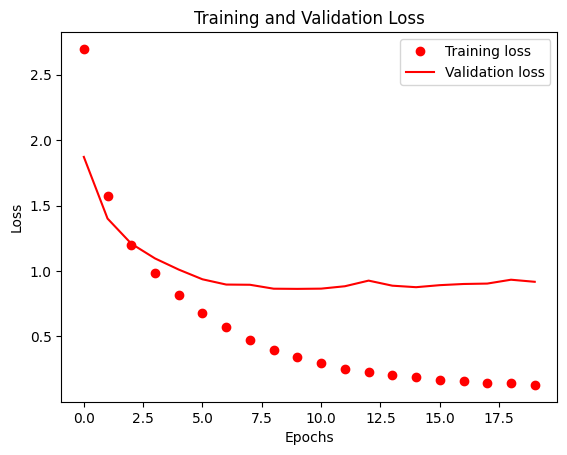

In [35]:
plt.plot(history['loss'], 'bo', label = 'Training loss', color='red')
plt.plot(history['val_loss'], label = 'Validation loss', color='red')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

C:\Users\agbad\AppData\Local\Temp\ipykernel_108472\1837758766.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history['accuracy'], 'bo', label = 'Training accuracy', color='green')


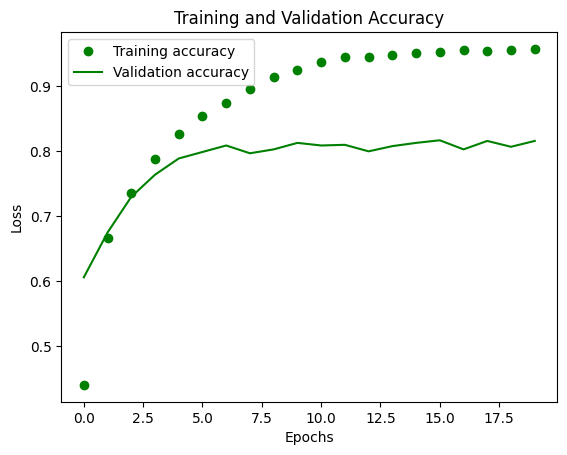

In [37]:
plt.plot(history['accuracy'], 'bo', label = 'Training accuracy', color='green')
plt.plot(history['val_accuracy'], label = 'Validation accuracy', color='green')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy')
plt.show()

### **Evaluate the model**

In [38]:
result = model.evaluate(x_test, y_test)
result

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8067 - loss: 0.9821


[1.0140471458435059, 0.7983080744743347]

**Accuracy on Test Data:** 80.67%